 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_csv = Path('../Starter_Code/Resources/whale_returns.csv')
whale = pd.read_csv(whale_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale.dropna(inplace=True)
#whale.isnull().sum()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_csv = Path('../Starter_Code/Resources/algo_returns.csv')
algo = pd.read_csv(algo_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo.dropna(inplace=True)
algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_csv = Path('../Starter_Code/Resources/sp500_history.csv')
sp500 = pd.read_csv(sp500_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [9]:
# Check Data Types
sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500['Close'] = sp500['Close'].str.replace("$","")
sp500['Close'] = sp500['Close'].astype('float')
sp500.dtypes

<ipython-input-10-6d76be6d0049>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500['Close'] = sp500['Close'].str.replace("$","")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_rtns = sp500.pct_change(-1) 
sp500_daily_rtns.head()

,Close
Date,
2019-04-23,0.008841
2019-04-22,0.001012
2019-04-18,0.001579
2019-04-17,-0.002274
2019-04-16,0.000509


In [12]:
# Drop nulls
sp500_daily_rtns.dropna()
#sp500.head()

,Close
Date,
2019-04-23,0.008841
2019-04-22,0.001012
2019-04-18,0.001579
2019-04-17,-0.002274
2019-04-16,0.000509
...,...
2012-10-08,-0.003457
2012-10-05,-0.000322
2012-10-04,0.007174


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_rtns.columns = ['SP500']
sp500_daily_rtns.head()

,SP500
Date,
2019-04-23,0.008841
2019-04-22,0.001012
2019-04-18,0.001579
2019-04-17,-0.002274
2019-04-16,0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale, algo, sp500_daily_rtns], axis='columns', join='inner')
combined_df.sort_index(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Select Portfolios Jan 2015 to Jul 2019'}, xlabel='Date'>

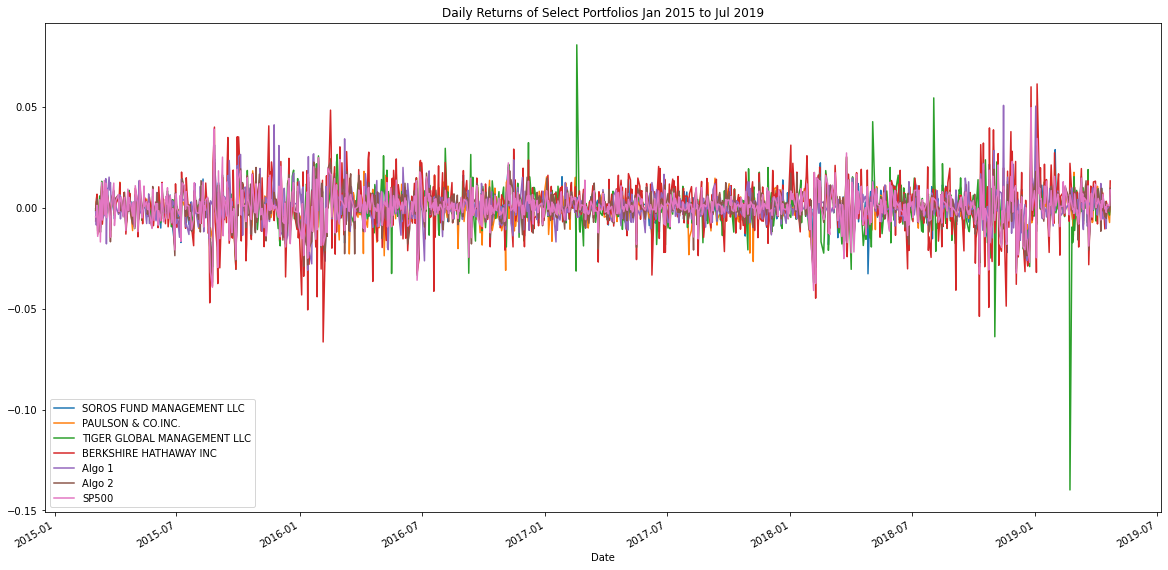

In [15]:
# Plot daily returns of all portfolios
daily_rtns = combined_df #pct_change function not needed as daily returns already in DF
daily_rtns.plot(figsize=(20,10), title='Daily Returns of Select Portfolios Jan 2015 to Jul 2019')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns for Select Portfolios Jan 2015 to Jul 2019'}, xlabel='Date'>

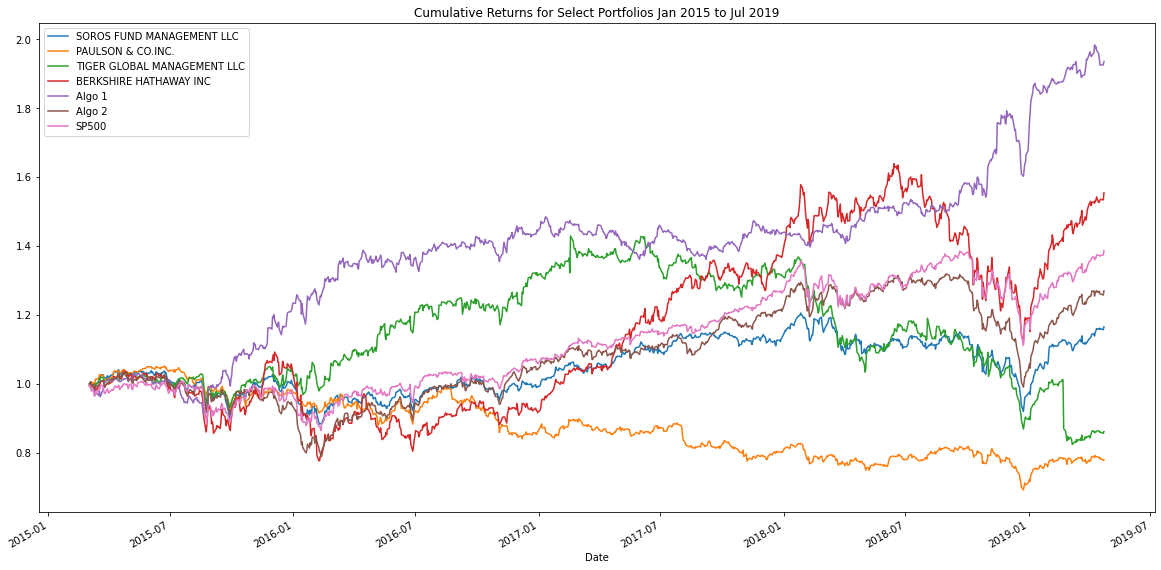

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_rtns = (1 + daily_rtns).cumprod()

# Plot cumulative returns
cumulative_rtns.plot(kind='line', figsize=(20,10),title='Cumulative Returns for Select Portfolios Jan 2015 to Jul 2019')

In [17]:
## Risk Analysis

#Determine the _risk_ of each portfolio:

#1. Create a box plot for each portfolio. 
#2. Calculate the standard deviation for all portfolios
#4. Determine which portfolios are riskier than the S&P 500
#5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns of Select Portfolios Jan 2015 to Jul 2019'}>

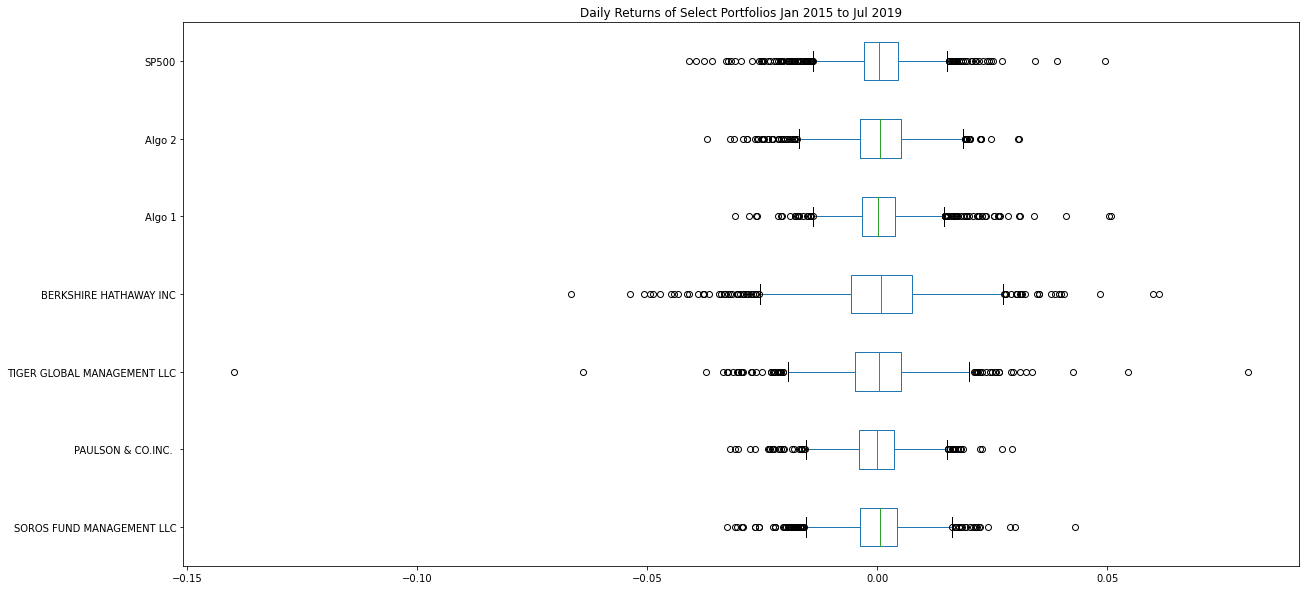

In [18]:
# Box plot to visually show risk
daily_rtns.plot(kind='box',vert=False,figsize=(20,10), title='Daily Returns of Select Portfolios Jan 2015 to Jul 2019')

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
std_dev = combined_df.std()
std_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
#The following portfolios are riskier than SP500: Berkshire Hathaway and Tiger Global Management

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = std_dev * np.sqrt(252)
annualized_std_dev

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500                          0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation of Select Portfolios'}, xlabel='Date'>

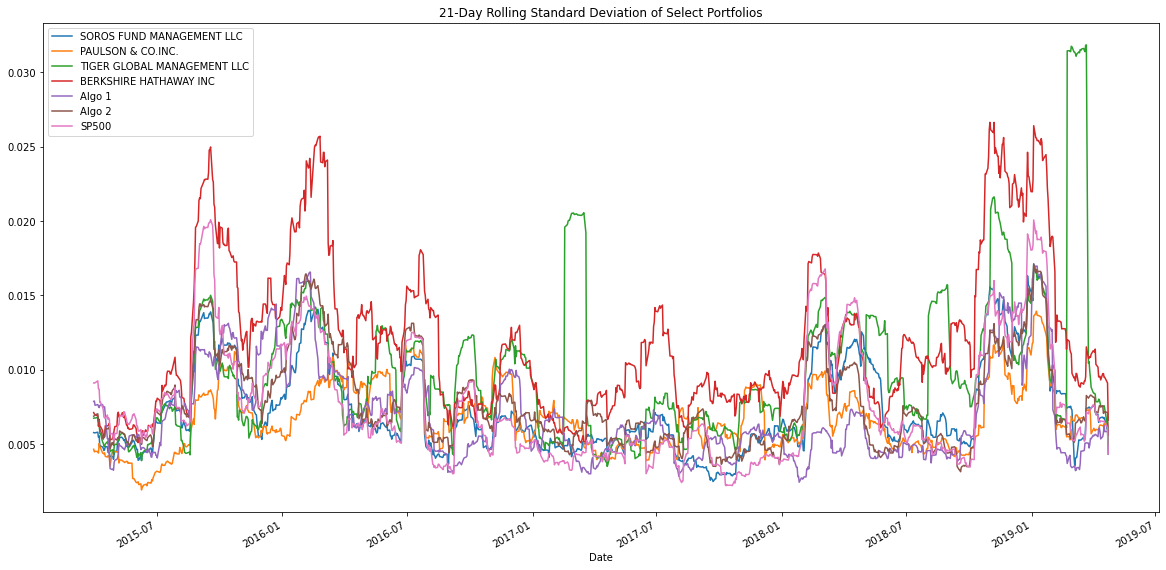

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = daily_rtns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_dev.plot(figsize=(20,10),title='21-Day Rolling Standard Deviation of Select Portfolios')

### Calculate and plot the correlation

<AxesSubplot:>

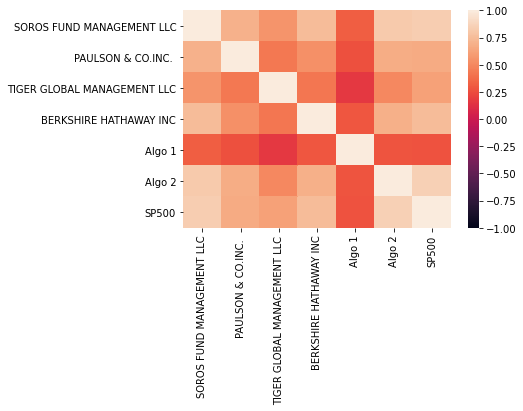

In [23]:
# Calculate the correlation
correlation = daily_rtns.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60-day Rolling Beta of Tiger Global Management'}, xlabel='Date'>

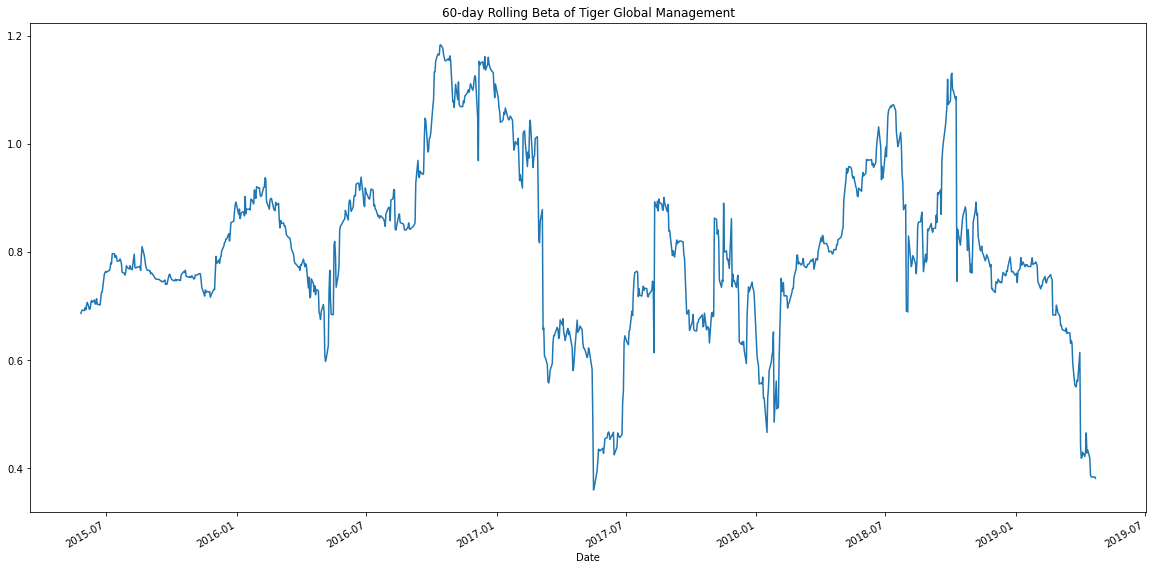

In [24]:
# Calculate covariance of a single portfolio
covariance = daily_rtns['TIGER GLOBAL MANAGEMENT LLC'].cov(daily_rtns['SP500'])

# Calculate variance of S&P 500
variance_sp500 = daily_rtns['SP500'].var()

# Computing beta
beta = covariance / variance_sp500

# Plot beta trend
rolling_beta = (daily_rtns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_rtns['SP500'])) / (daily_rtns['SP500'].rolling(window=60).var())
rolling_beta.plot(figsize=(20,10),title='60-day Rolling Beta of Tiger Global Management')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'21-day Rolling Beta of Tiger Global Management'}, xlabel='Date'>

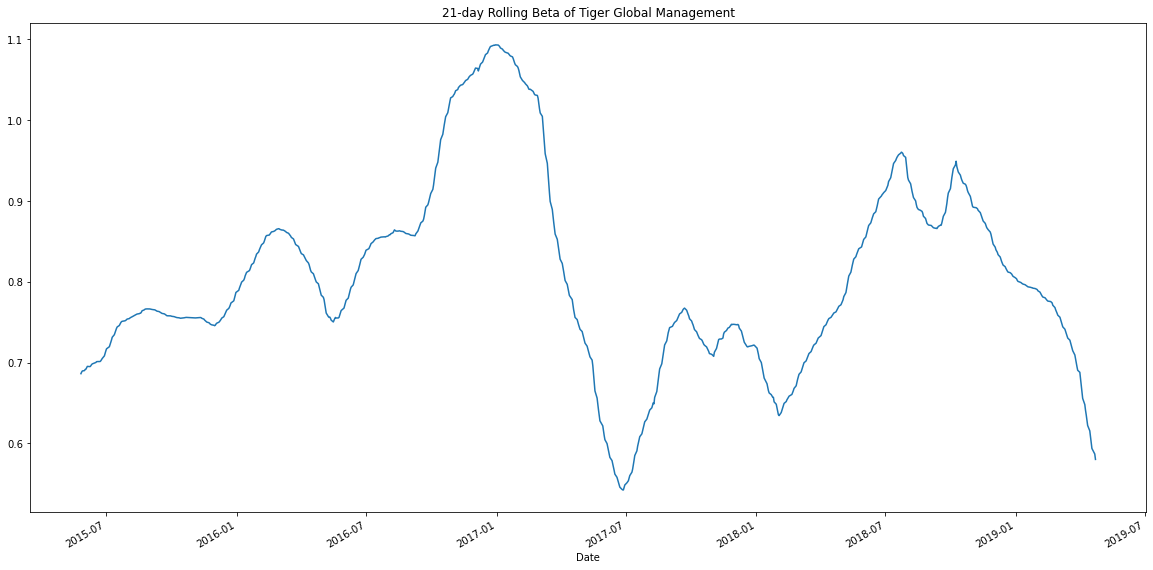

In [25]:
# Use `ewm` to calculate the rolling window
rolling_window = rolling_beta.ewm(halflife=21).mean()
rolling_window.plot(figsize=(20,10),title='21-day Rolling Beta of Tiger Global Management')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
risk_free_return = 0

Sharpe_Ratios = ((daily_rtns.mean() - risk_free_return)/(std_dev)) * np.sqrt(252)
Sharpe_Ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of Select Portfolios'}>

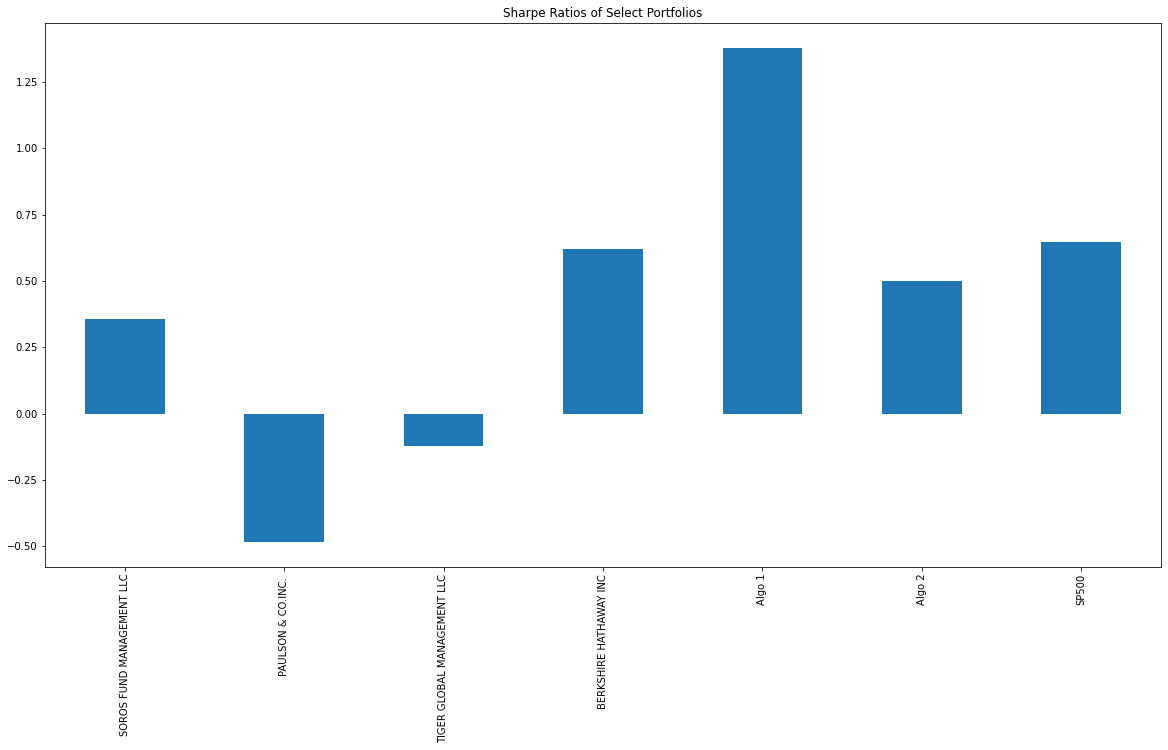

In [27]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratios.plot(kind='bar',figsize=(20,10),title="Sharpe Ratios of Select Portfolios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!


The Algo 1 portfolio outperforms both the market and the whale portfolios on both a cumulative and risk adjusted basis over the observation period.
The Algo 2 portfolio underperforms the S&P500 on a cumulaive and risk adjusted basis; however, it outperforms all of the whale portfolios except for Berkshire on these same dimensions. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
aapl_csv = Path('../Starter_Code/Resources/aapl_historical.csv')
aapl = pd.read_csv(aapl_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl = aapl.rename(columns={
    aapl.columns[1]:'AAPL',
})    
aapl.head()

,Symbol,AAPL
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [29]:
# Reading data from 2nd stock
goog_csv = Path('../Starter_Code/Resources/goog_historical.csv')
goog = pd.read_csv(goog_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog = goog.rename(columns={
    goog.columns[1]:'GOOG',
})    
goog.head()

,Symbol,GOOG
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [30]:
# Reading data from 3rd stock
cost_csv = Path('../Starter_Code/Resources/cost_historical.csv')
cost = pd.read_csv(cost_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost = cost.rename(columns={
    cost.columns[1]:'COST',
})    
cost.head()

,Symbol,COST
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [31]:
# Combine all stocks in a single DataFrame
stock_df = pd.concat([aapl, goog, cost], axis='columns', join='inner')
stock_df.sort_index(inplace=True)
stock_df.head()

,Symbol,AAPL,Symbol,GOOG,Symbol,COST
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [32]:
# Reset Date index
stock_df.sort_index(inplace=True)
stock_df.head()

,Symbol,AAPL,Symbol,GOOG,Symbol,COST
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [33]:
# Reorganize portfolio data by having a column per symbol
stock_df = stock_df.drop(columns=stock_df.columns[0])

stock_df.head()

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [34]:
# Calculate daily returns
stock_returns = stock_df.pct_change()
# Drop NAs
stock_returns.dropna()
# Display sample data
stock_returns.describe()

,AAPL,GOOG,COST
count,249.000000,249.000000,249.000000
mean,0.000426,0.000366,0.000964
std,0.018706,0.016602,0.013186
min,-0.099607,-0.076966,-0.085868
25%,-0.008068,-0.007150,-0.004171
50%,0.001326,0.000101,0.002780
75%,0.008994,0.009613,0.007123
max,0.070422,0.064780,0.050879


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
stock_portfolio = stock_returns.dot(weights)

# Display sample data
stock_portfolio.head()

Trade DATE
2018-05-11         NaN
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [67]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios = pd.concat([combined_df, stock_portfolio], axis='columns', join='inner')
all_portfolios = all_portfolios.rename(columns={
    all_portfolios.columns[7]:'Stonks',
})
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,Stonks
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,NaN
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595


In [68]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized `std`
annualized_std_all = all_portfolios.std() * np.sqrt(252)
annualized_std_all

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500                          0.152054
Stonks                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation of Select Portfolios'}>

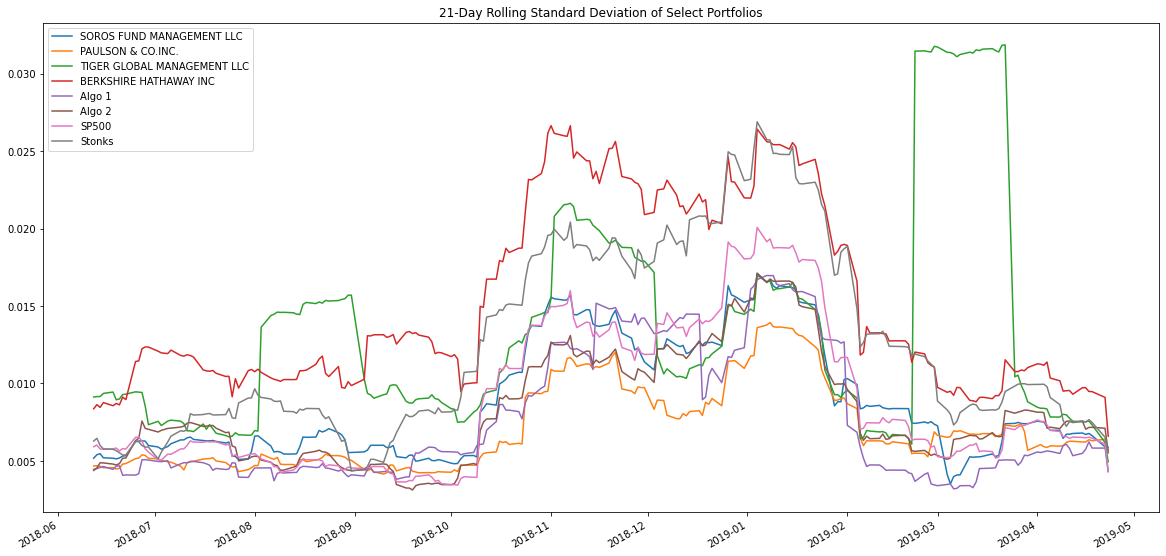

In [70]:
# Calculate rolling standard deviation
rolling_std_all = all_portfolios.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std_all.plot(figsize=(20,10),title='21-Day Rolling Standard Deviation of Select Portfolios')

### Calculate and plot the correlation

<AxesSubplot:>

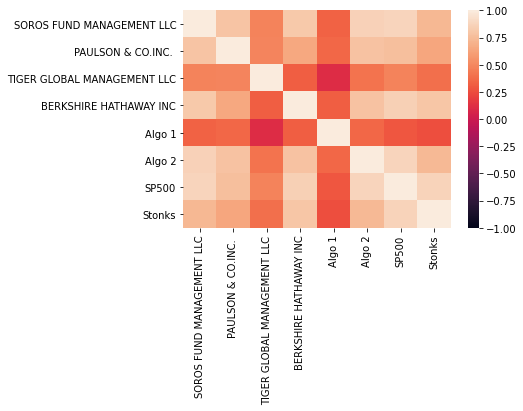

In [71]:
# Calculate and plot the correlation
correlation_all = all_portfolios.corr()
sns.heatmap(correlation_all, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-day Rolling Beta of Stonk Portfolio'}>

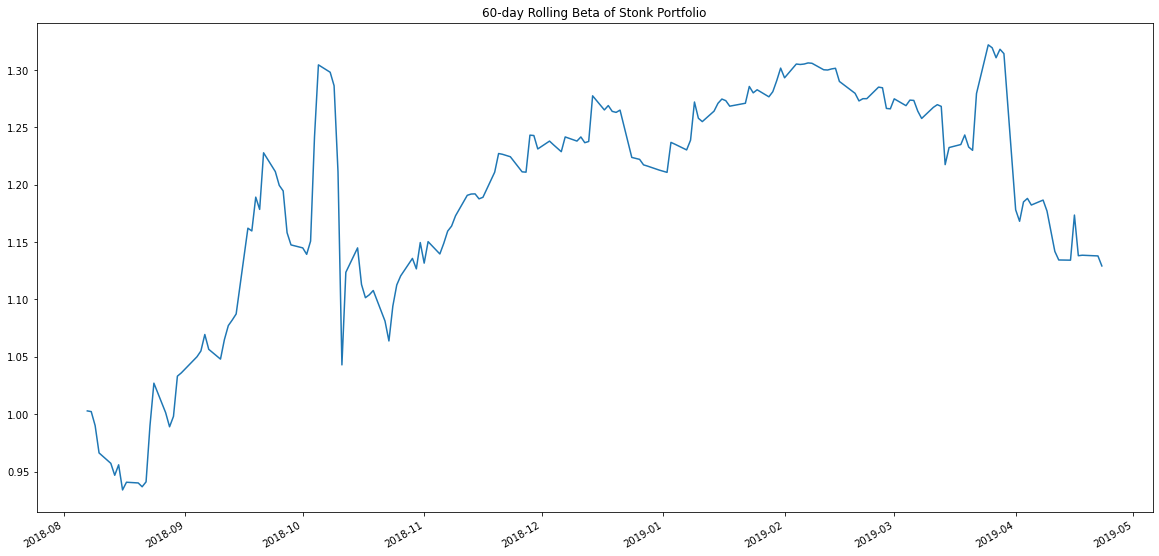

In [72]:
# Calculate and plot Beta
covariance_2 = all_portfolios['Stonks'].cov(all_portfolios['SP500'])

# Calculate variance of S&P 500
variance_sp500_2 = all_portfolios['SP500'].var()

# Computing beta
beta2 = covariance_2 / variance_sp500_2

# Plot beta trend
rolling_beta_2 = (all_portfolios['Stonks'].rolling(window=60).cov(all_portfolios['SP500'])) / (all_portfolios['SP500'].rolling(window=60).var())
rolling_beta_2.plot(figsize=(20,10),title='60-day Rolling Beta of Stonk Portfolio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [93]:
# Calculate Annualzied Sharpe Ratios
all_portfolio_rtns = all_portfolios
all_portfolio_std = all_portfolios.std()

Sharpe_Ratios_2 = (all_portfolio_rtns.mean() - risk_free_return)/(all_portfolio_std) * np.sqrt(252)
Sharpe_Ratios_2

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP500                          0.584820
Stonks                         0.933123
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of Select Portfolios'}>

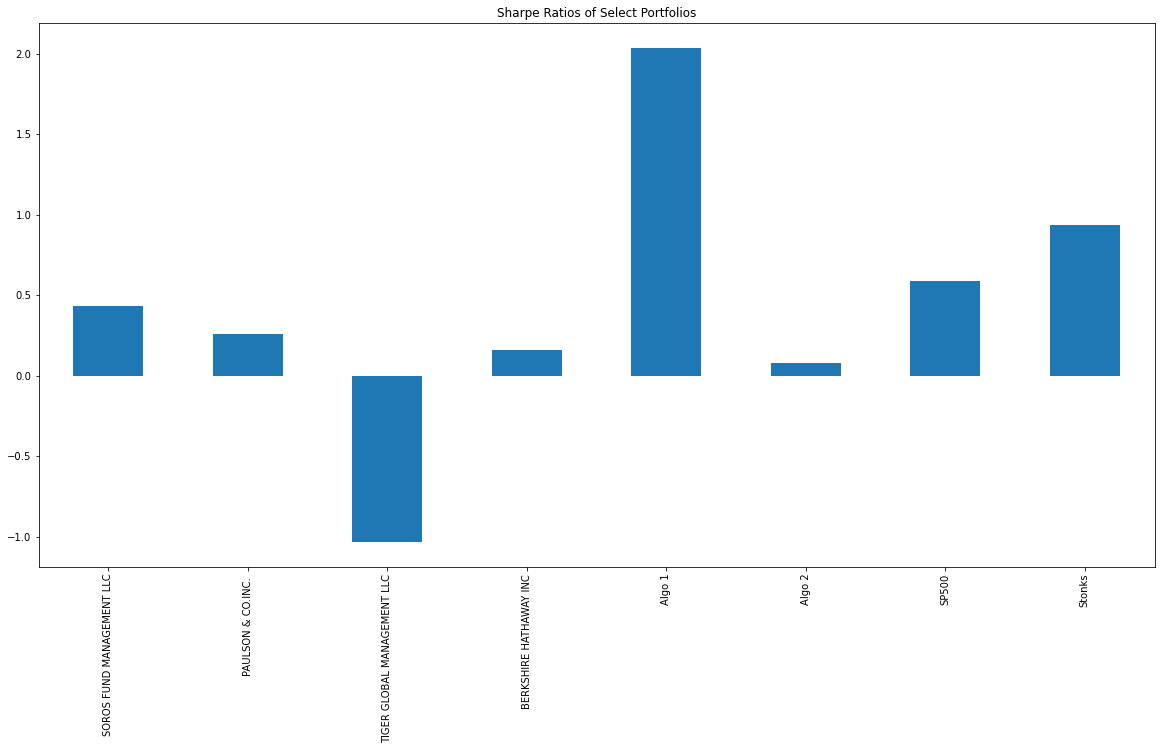

In [95]:
# Visualize the sharpe ratios as a bar plot
Sharpe_Ratios_2.plot(kind='bar',figsize=(20,10),title="Sharpe Ratios of Select Portfolios")

### How does your portfolio do?

Write your answer here!

The equal weighted GOOG, AAPL, and COST Portfolio out performs all portfolios, except for Algo 1, on both a return and efficiency basis.